In [27]:
from tensorflow.python.lib.io.file_io import FileIO as open_file
import math
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def correlation_matrix(df, labels):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    #labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

# Superheroes

In [4]:
with open_file("gs://ml-research-injenia/estimators/datasets/superhero-set/preproc_dataset.csv", "r") as f:
    superheroes_df=pd.read_csv(f)
superheroes_df

,index,Gender,Eye_color,Race,Hair_color,Height,Publisher,Skin_color,Alignment,Weight,...,Web_Creation,Reality_Warping,Odin_Force,Symbiote_Costume,Speed_Force,Phoenix_Force,Molecular_Dissipation,Vision_Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,...,False,False,False,False,False,False,False,False,False,False
8,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,...,False,False,False,False,False,False,False,False,False,False
9,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df=superheroes_df.copy()

In [6]:
exclude_columns=["Publisher","Height","Weight","Skin_color","Race"]
INDEX=df.columns[0]
COLUMNS=[x for x in df.columns[1:] if x not in exclude_columns]
LABEL_FIELD="Alignment"

In [15]:
len(df[COLUMNS].columns)

171

In [16]:
len(df[COLUMNS].corr().columns)

167

In [19]:
df[LABEL_FIELD] = df[LABEL_FIELD].astype('category')
df[LABEL_FIELD].cat.categories = [0,2,1]
df[LABEL_FIELD]=df[LABEL_FIELD].astype('float')

In [25]:
s=df.corr()["Alignment"]

In [28]:
s.apply(abs).sort_values()

Vision_Night                0.000176
Weapons_Master              0.000552
Light_Control               0.001034
Stamina                     0.001349
Telepathy                   0.002018
Photographic_Reflexes       0.002669
Animal_Attributes           0.003482
Time_Manipulation           0.003670
Omnilingualism              0.003727
Animal_Control              0.004645
Elasticity                  0.004645
Underwater_breathing        0.004672
Jump                        0.005564
Sub-Mariner                 0.006046
Accelerated_Healing         0.006405
Sonic_Scream                0.006811
Cloaking                    0.006811
Enhanced_Touch              0.006811
Weather_Control             0.006811
Time_Travel                 0.007464
Height                      0.007750
Echolocation                0.007980
Vitakinesis                 0.007980
Probability_Manipulation    0.009541
Portal_Creation             0.010279
Energy_Beams                0.010302
Vision_Telescopic           0.010689
V

# Kickstarter

In [40]:
with open_file("gs://ml-research-injenia/estimators/datasets/kickstarter-set/2016_evalset.csv", "r") as f:
    kickstarter_df=pd.read_csv(f)
kickstarter_df

,ID,category,main_category,currency,state,country,timespan_days,goal_USD,goal_USD_log,timespan_days_scaled,goal_USD_scaled,goal_USD_log_scaled
0,153415837,Flight,Technology,USD,failed,US,30.0,1.500000e+04,9.615805,-0.308155,-0.024352,0.620471
1,1828026144,Fine Art,Photography,USD,failed,US,31.0,6.500001e+06,15.687313,-0.230583,6.036428,4.261331
2,919600393,Children's Books,Publishing,USD,failed,US,32.0,2.000000e+03,7.600902,-0.153011,-0.036501,-0.587792
3,1621230227,Comic Books,Comics,USD,failed,US,30.0,4.000000e+03,8.294050,-0.308155,-0.034632,-0.172137
4,954788005,Theater,Theater,USD,successful,US,14.0,3.500000e+03,8.160518,-1.549306,-0.035099,-0.252211
5,1094453155,Flight,Technology,USD,failed,US,53.0,1.000000e+04,9.210340,1.475999,-0.029025,0.377329
6,536236122,Experimental,Film & Video,USD,successful,US,17.0,2.500000e+01,3.218876,-1.316590,-0.038347,-3.215532
7,2076494684,Quilts,Crafts,USD,failed,US,28.0,1.800000e+03,7.495542,-0.463299,-0.036688,-0.650972
8,70609801,Young Adult,Publishing,EUR,failed,DE,60.0,1.246400e+04,9.430600,2.019002,-0.026722,0.509410
9,1269516548,Product Design,Design,USD,successful,US,30.0,7.500000e+03,8.922658,-0.308155,-0.031361,0.204817


In [53]:
df=kickstarter_df.copy()

In [54]:
INDEX="ID"
COLUMNS=df.columns[1:]
LABEL_FIELD="state"
LABEL_FIELD_CATEGORICAL=LABEL_FIELD+"_CATEGORICAL"

In [55]:
len(df[COLUMNS].columns)

11

In [56]:
len(df[COLUMNS].corr().columns)

6

In [58]:
df[LABEL_FIELD_CATEGORICAL] = df[LABEL_FIELD].astype('category')
df[LABEL_FIELD_CATEGORICAL].cat.categories = [0,1]
df[LABEL_FIELD_CATEGORICAL]=df[LABEL_FIELD_CATEGORICAL].astype('float')

In [59]:
s=df.corr()[LABEL_FIELD_CATEGORICAL]

In [60]:
s.apply(abs).sort_values()

ID                      0.008948
goal_USD                0.030369
goal_USD_scaled         0.030369
timespan_days_scaled    0.106626
timespan_days           0.106626
goal_USD_log_scaled     0.224361
goal_USD_log            0.224361
state_CATEGORICAL       1.000000
Name: state_CATEGORICAL, dtype: float64

In [61]:
df[LABEL_FIELD].value_counts()

failed        16822
successful    11308
Name: state, dtype: int64

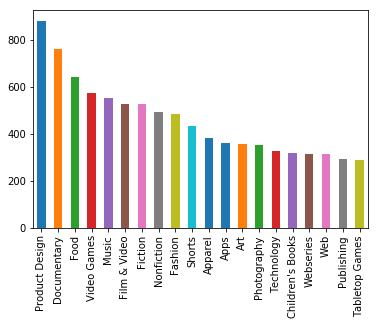

In [66]:
df[df[LABEL_FIELD]=="failed"]["category"].value_counts()[:20].plot.bar()

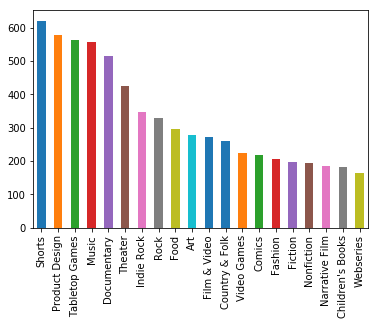

In [67]:
df[df[LABEL_FIELD]=="successful"]["category"].value_counts()[:20].plot.bar()